In [ ]:
# To find out the impact of the MJO on the OLR during the Monsoon Onset Phase (May 10 - June 15)
# To find out the difference in the impact of MJO during the MOV and non-MOV years

# NCSU Tropical Dynamics 
# April 2023
# A. Aiyyer and S. Dhavale

In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cmaps
import cartopy

import geocat.viz as gv
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

from datetime import datetime, date

import pandas as pd

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


In [2]:
# read the file with mjo filtered olr
file_path='mjo_filtered.nc'
ds = xr.open_dataset(file_path)
mjo=ds.olr

In [3]:
# loop over each year and calculate variance over the days we need

m1 = 5
m2 = 6
d1 = 10
d2 = 15
i=0
for iy in range(1982,2022):
    #temp = mjo.loc[mjo['time.year'].isin([iy])]
    date_start = date(iy,m1,d1)
    date_end   = date(iy,m2,d2)
    temp = mjo.sel(time=slice(date_start,date_end)).var(dim='time')
    if ( i==0):
       mjo_var=temp
    else:
        a = i
        b = a+1
        mjo_var= mjo_var*a/b + temp/b
    #print (i,iy, temp[5,10].values, mjo_var[5,10].values)
    i=i+1

In [4]:
# now calculate the variance over all days (not just the onset period)

mjo_var_all = mjo.var(dim='time')

In [5]:
# mjo variance over the summer

m1 = 5
m2 = 9
d1 = 1
d2 = 30
i=0
for iy in range(1982,2022):
    date_start = date(iy,m1,d1)
    date_end   = date(iy,m2,d2)
    temp = mjo.sel(time=slice(date_start,date_end)).var(dim='time')
    if ( i==0):
       mjo_var_all = temp
    else:
        a = i
        b = a+1
        mjo_var_all = mjo_var_all*a/b + temp/b
    i=i+1

In [6]:
# MOV formation locations
fileName = './mov_formation_ibtracs_imd_final.ascii'
mov_list = pd.read_csv(fileName,parse_dates=['date'],delimiter=' ')

mov_list.date.dt.year
mov_years = mov_list.date.dt.year.values
years = list(range(1982,2022))
non_mov_years = [x for x in years if x not in mov_years]

In [7]:
print(mov_years)

[1983 1984 1985 1987 1988 1989 1992 1994 1996 1998 1999 2001 2004 2007
 2008 2009 2010 2011 2014 2015 2018 2019 2020]


In [8]:
print(non_mov_years)

[1982, 1986, 1990, 1991, 1993, 1995, 1997, 2000, 2002, 2003, 2005, 2006, 2012, 2013, 2016, 2017, 2021]


In [9]:
m1 = 5
m2 = 6
d1 = 10
d2 = 15

i=0
for iy in mov_years:
    date_start = date(iy,m1,d1)
    date_end   = date(iy,m2,d2)    
    temp = mjo.sel(time=slice(date_start,date_end)).var(dim='time')
    if ( i == 0):
       mjo_var_mov_years=temp
    else:
        a = i
        b = a+1
        mjo_var_mov_years= mjo_var_mov_years*a/b + temp/b
    #print (i,iy, temp[5,10].values, mjo_var_mov_years[5,10].values)
    i = i + 1

In [10]:
m1 = 5
m2 = 6
d1 = 10
d2 = 15
i=0
for iy in non_mov_years:
    date_start = date(iy,m1,d1)
    date_end   = date(iy,m2,d2)
    temp = mjo.sel(time=slice(date_start,date_end)).var(dim='time')
 
    if ( i == 0):
       mjo_var_non_mov_years=temp
    else:
        a = i
        b = a+1
        mjo_var_non_mov_years= mjo_var_non_mov_years*a/b + temp/b
    #print (i,iy, temp[5,10].values, mjo_var_non_mov_years[5,10].values)
    i = i + 1

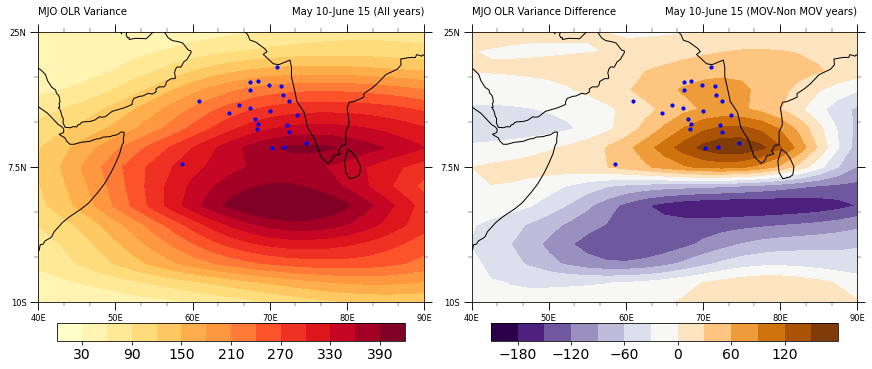

In [11]:
minlon =  40.
maxlon =  90.
minlat =   -10.
maxlat =   25



projection = ccrs.PlateCarree()
fig, ax = plt.subplots(1,
                       2,
                       constrained_layout=True,
                       subplot_kw={"projection": projection})


# Set figure size (width, height) in inches
fig.set_size_inches((12,12))

# Add continents
continents = cartopy.feature.NaturalEarthFeature(name="coastline",
                                                 category="physical",
                                                 scale="110m",
                                                 edgecolor="black",
                                                 facecolor="none")
[axes.add_feature(continents) for axes in ax.flat]


# Import an NCL colormap
cmap = 'YlOrRd'

# Specify which contour levels to draw
contour_lev = np.arange(30, 420, 30)

# Using a dictionary makes it easy to reuse the same keyword arguments twice for the contours
kwargs = dict(xlim=(minlon, maxlon),
              ylim=(minlat, maxlat),
              xticks=np.linspace(minlon, maxlon, 6),
              yticks=np.linspace(minlat, maxlat,3),
              transform=projection,  # ds projection
              add_colorbar=False,  # don't add individual colorbars for each plot call
              add_labels=False,  # turn off xarray's automatic Lat, lon labels
)



# Plot filled contour
mjo_var_plot = mjo_var.plot.contourf(ax=ax[0],levels=contour_lev,cmap=cmap,**kwargs)
cbar = plt.colorbar(mjo_var_plot,ax=ax[0],
                    orientation='horizontal',
                    shrink=0.9,
                    pad=0.001,
                    extendrect=True,
                    extendfrac='auto')
# Make colorbar tick labels larger and rotate them
cbar.ax.tick_params(labelsize=14, rotation=0)



# Panel 2 (Subplot 2)
contour_lev = np.arange(-180,180,30)
cmap =  'PuOr_r' # reversed colors using _r



mjod_var_diff = mjo_var_mov_years - mjo_var_non_mov_years
mjo_diff_plot = mjod_var_diff.plot.contourf(ax=ax[1],cmap=cmap,levels=contour_lev,**kwargs)
cbar = plt.colorbar(mjo_diff_plot,ax=ax[1],
                    orientation='horizontal',
                    shrink=0.9,
                    pad=0.001, #
                    extendrect=True,
                    extendfrac='auto')
# Make colorbar tick labels larger and rotate them
cbar.ax.tick_params(labelsize=14, rotation=0)




# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax[0])
gv.add_major_minor_ticks(ax[1])

# Use geocat.viz.util convenience function to make plots look like NCL plots by
# using latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax[0])
gv.add_lat_lon_ticklabels(ax[1])
# Remove the degree symbol from tick labels
ax[0].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[0].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
ax[1].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[1].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Use geocat.viz.util convenience function to set titles and labels
gv.set_titles_and_labels(ax[0],
                         lefttitle="MJO OLR Variance",
                         righttitle="May 10-June 15 (All years)",                         
                         lefttitlefontsize=10,
                         righttitlefontsize=10)
gv.set_titles_and_labels(ax[1],
                         lefttitle="MJO OLR Variance Difference",
                         righttitle="May 10-June 15 (MOV-Non MOV years)",                         
                         lefttitlefontsize=10,
                         righttitlefontsize=10)



# marker size is controlled by s
ax[0].scatter(mov_list.lon,mov_list.lat,s=10,color='blue', transform=ccrs.PlateCarree())   
ax[1].scatter(mov_list.lon,mov_list.lat,s=10,color='blue', transform=ccrs.PlateCarree())   
  
plt.savefig("mjo_variance.png")


In [12]:
#mjo = olr.loc[olr['time.month'].isin([11,12,1,2,3,4])]   #.var(dim='time')
#mjo = olr.loc[olr['time.month'].isin([5,6,7,8,9,10])]   #.var(dim='time')

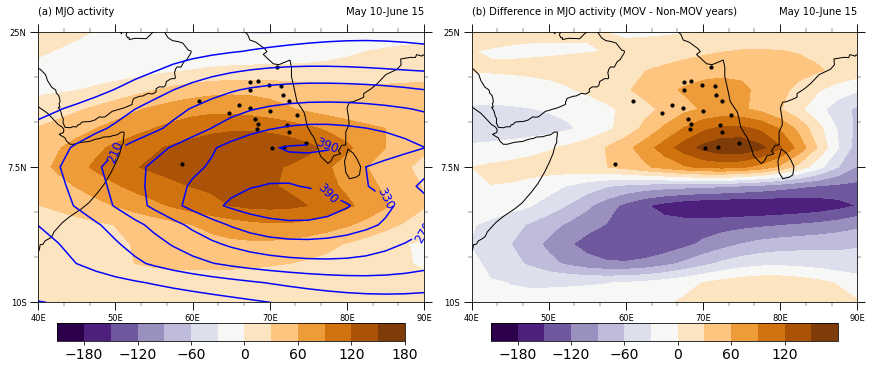

In [24]:
minlon =  40.
maxlon =  90.
minlat =   -10.
maxlat =   25.



projection = ccrs.PlateCarree()
fig, ax = plt.subplots(1,
                       2,
                       constrained_layout=True,
                       subplot_kw={"projection": projection})


# Set figure size (width, height) in inches
fig.set_size_inches((12,12))

# Add continents
continents = cartopy.feature.NaturalEarthFeature(name="coastline",
                                                 category="physical",
                                                 scale="110m",
                                                 edgecolor="black",
                                                 facecolor="none")
[axes.add_feature(continents) for axes in ax.flat]


# Import an NCL colormap
cmap = 'YlOrRd'


# Using a dictionary makes it easy to reuse the same keyword arguments twice for the contours
kwargs = dict(xlim=(minlon, maxlon),
              ylim=(minlat, maxlat),
              xticks=np.linspace(minlon, maxlon, 6),
              yticks=np.linspace(minlat, maxlat,3),
              transform=projection,  # ds projection
              add_colorbar=False,  # don't add individual colorbars for each plot call
              add_labels=False,  # turn off xarray's automatic Lat, lon labels
)



# Plot filled contour

cmap =  'PuOr_r' # reversed colors using _r

# Specify which contour levels to draw
contour_lev = np.arange(-210,210,30.)
# Plot filled contour

mjo_var_anom = mjo_var - mjo_var_all
mjo_var_plot = mjo_var_anom.plot.contourf(ax=ax[0],levels=contour_lev,cmap=cmap,**kwargs)

cbar = plt.colorbar(mjo_var_plot,ax=ax[0],
                    orientation='horizontal',
                    shrink=0.9,
                    pad=0.001,
                    extendrect=True,
                    extendfrac='auto')
# Make colorbar tick labels larger and rotate them
cbar.ax.tick_params(labelsize=14, rotation=0)



# Specify which contour levels to draw
contour_lev = np.arange(30, 420, 60)
# Using a dictionary makes it easy to reuse the same keyword arguments twice for the contours
mjo_var_plot = mjo_var.plot.contour(ax=ax[0],levels=contour_lev,colors='b',**kwargs)
ax[0].clabel(mjo_var_plot, fmt='%2.0f', colors='b', fontsize=12)



#------------------------------------------------------------------------------------
# Panel 2 (Subplot 2)
contour_lev = np.arange(-180,180,30)
cmap =  'PuOr_r' # reversed colors using _r



mjod_var_diff = mjo_var_mov_years - mjo_var_non_mov_years
mjo_diff_plot = mjod_var_diff.plot.contourf(ax=ax[1],cmap=cmap,levels=contour_lev,**kwargs)
cbar = plt.colorbar(mjo_diff_plot,ax=ax[1],
                    orientation='horizontal',
                    shrink=0.9,
                    pad=0.001, #
                    extendrect=True,
                    extendfrac='auto')
# Make colorbar tick labels larger and rotate them
cbar.ax.tick_params(labelsize=14, rotation=0)




# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax[0])
gv.add_major_minor_ticks(ax[1])

# Use geocat.viz.util convenience function to make plots look like NCL plots by
# using latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax[0])
gv.add_lat_lon_ticklabels(ax[1])
# Remove the degree symbol from tick labels
ax[0].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[0].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
ax[1].yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax[1].xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Use geocat.viz.util convenience function to set titles and labels
gv.set_titles_and_labels(ax[0],
                         lefttitle="(a) MJO activity",
                         righttitle="May 10-June 15",                         
                         lefttitlefontsize=10,
                         righttitlefontsize=10)
gv.set_titles_and_labels(ax[1],
                         lefttitle="(b) Difference in MJO activity (MOV - Non-MOV years)",
                         righttitle="May 10-June 15",                         
                         lefttitlefontsize=10,
                         righttitlefontsize=10)



# marker size is controlled by s
ax[0].scatter(mov_list.lon,mov_list.lat,s=10,color='black', transform=ccrs.PlateCarree())   
ax[1].scatter(mov_list.lon,mov_list.lat,s=10,color='black', transform=ccrs.PlateCarree())   
  
plt.savefig("mjo_variance.png")

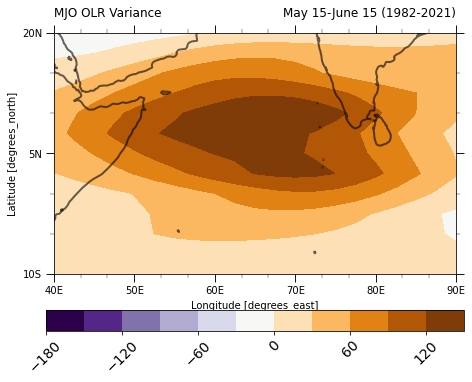

In [14]:
minlon =  40.
maxlon =  90.
minlat =   -10.
maxlat =   20.

    
# Generate axes, using Cartopy, drawing coastlines, and adding features
projection = ccrs.PlateCarree()
# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(10, 6))
# Generate axes using Cartopy and draw coastlines
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines(linewidths=2., alpha=0.6)

# Use geocat.viz.util convenience function to set axes limits & tick values

gv.set_axes_limits_and_ticks(ax,
                                     xlim=(minlon, maxlon),
                                     ylim=(minlat, maxlat),
                                     xticks=np.linspace(minlon, maxlon, 6),
                                     yticks=np.linspace(minlat, maxlat,3))


# Use geocat.viz.util convenience function to add minor and major tick lines
gv.add_major_minor_ticks(ax, labelsize=10)

# Use geocat.viz.util convenience function to make latitude, longitude tick labels
gv.add_lat_lon_ticklabels(ax)
# Remove degree symbol from tick labels
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Use geocat.viz.util convenience function to add titles
gv.set_titles_and_labels(ax,
                         lefttitle="MJO OLR Variance",
                         righttitle="May 15-June 15 (1982-2021)",
                         lefttitlefontsize=12,
                         righttitlefontsize=12)


# Import an NCL colormap
cmap = 'YlOrRd'
cmap =  'PuOr_r' # reversed colors using _r

# Specify which contour levels to draw
contour_lev = np.arange(-180,180,30.)
# Plot filled contour

mjo_anom = mjo_var-mjo_var_all


contour = mjo_anom.plot.contourf(ax=ax,
                          transform=ccrs.PlateCarree(),
                          cmap=cmap,
                          levels=contour_lev,
                          add_colorbar=False)
  

# Create horizontal colorbar
# By changing the kwarg `pad`, the colorbar can be moved closer to or farther away from
# the axis parallel to it.
# `pad` defaults to 0.15 for horizontal colorbars
# `extendrect` and `extendfrac` format the ends of the colorbar, default is
# pointed ends to show there are values beyond the given contour levels
cbar = plt.colorbar(contour,
                    ax=ax,
                    orientation='horizontal',
                    shrink=0.75,
                    pad=0.11,
                    extendrect=True,
                    extendfrac='auto')
# Make colorbar tick labels larger and rotate them
cbar.ax.tick_params(labelsize=14, rotation=45)


# Format colorbar title, this will make the title appear above the colorbar
#cbar.ax.set_title('Default position for color bar title', fontsize=10)
plt.show()